#Episcource Assignment

In [ ]:
# import library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [44]:
# load the dataset from github
df = pd.read_json('https://raw.githubusercontent.com/surendra769/Assignment/main/Episource%20Assignment/loan_data.json')
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


**1. Find % of total applicants for each unique value of dependents.**

In [45]:
percentage_of_unique_values = round(df['Dependents'].value_counts()*100/len(df), 2)    
percentage_of_unique_values

0     57.53
2     17.22
1     16.63
3+     8.61
Name: Dependents, dtype: float64

**57.53% of applicants have no dependent, 16.63%  have 1 dependent, 17.22% have 2 dependent and  only 8.61% of applicant have more than 2 dependent**

**2. Find the %of applications approved for self-employed applicants.**

In [46]:
self_emp = len(df[(df['Self_Employed'] == 'Yes') & (df['Application_Status'] == 'Y')])*100/len(df)   # & denote and condition in python
self_emp = round(self_emp ,2)
self_emp


9.0

**There are 9% applicant whose applicaion are approved and they are self employed**

**3. What is the % of rejections for married male applicants?**

In [47]:
mar_app = len(df[(df['Gender'] == 'Male') & (df['Married'] == 'Yes') & (df['Application_Status'] == 'N')])*100/len(df)
mar_app = round(mar_app, 2)
mar_app

17.03

**The Rejection rate for married man is 17.03%**

**4) Which property area has the maximum approval ratio.**

In [81]:

df1 = (pd.crosstab(df['Property_Area'], df['Application_Status'] , normalize='index')   # normalize is for ratio
         .mul(100)
         .reset_index()
         .rename_axis(None, axis=1))
df1.drop('N', axis = 1, inplace = True)
df1.columns = ['Property_Area', 'Approval ratio']
df1

,Property_Area,Approval ratio
0,Rural,60.402685
1,Semiurban,77.664975
2,Urban,63.030303


**Semi Urban have highest approval ratio which is 77.65%**

**5. Find average number of dependents per income group.**

In [49]:
df['Dependents'].value_counts()

0     294
2      88
1      85
3+     44
Name: Dependents, dtype: int64

In [50]:
df.head(2)

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N


In [51]:
df['Dependents'] = df['Dependents'].str.replace('\+', '')  # use regex to replace + sign
df['Dependents'] = df['Dependents'].astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [52]:
num_dep = df.groupby('Income')['Dependents'].mean().reset_index()
num_dep.columns = ['Income group', 'No of dependents']
num_dep

,Income group,No of dependents
0,high,0.888889
1,low,0.641026
2,medium,0.922280


In [53]:
df['Dependents'] = df['Dependents'].astype(str)

**6. Find approval ratio for various combinations of Property_Area and Marrital status.**

In [54]:
df4 = df[['Property_Area', 'Married', 'Application_Status']].value_counts().reset_index()
df4.columns = ['Property_Area', 'Marrital Status', 'No of applicants', 'Approval']

In [55]:
df4 = (pd.crosstab([df4['Property_Area'], df4['Marrital Status']], df4['No of applicants'],  df4['Approval'], aggfunc= 'mean', normalize= 'index')
       .reset_index().
       rename_axis(None, axis =  1))
df4.drop(['N'], axis = 1, inplace = True)

df4.columns = ['Property_Area', 'Marrital Status', 'Approval ratio']
df4

,Property_Area,Marrital Status,Approval ratio
0,Rural,No,0.607143
1,Rural,Yes,0.602151
2,Semiurban,No,0.691176
3,Semiurban,Yes,0.821705
4,Urban,No,0.535714
5,Urban,Yes,0.678899


In [56]:
df5 = df[['Property_Area', 'Married']].value_counts().reset_index()
df5.columns = ['Property_Area', 'Marrital Status', 'No of applicants']
df5

,Property_Area,Marrital Status,No of applicants
0,Semiurban,Yes,129
1,Urban,Yes,109
2,Rural,Yes,93
3,Semiurban,No,68
4,Rural,No,56
5,Urban,No,56


In [57]:
df6 = pd.merge(df4, df5, on=['Property_Area','Marrital Status'])
new_cols = ['Property_Area','Marrital Status', 'No of applicants', 'Approval ratio' ]
df6=df6.reindex(columns=new_cols)
df6['Marrital Status'] = df6['Marrital Status'].map({'Yes': 'Married', 'No': "Unmarried"})
df6

,Property_Area,Marrital Status,No of applicants,Approval ratio
0,Rural,Unmarried,56,0.607143
1,Rural,Married,93,0.602151
2,Semiurban,Unmarried,68,0.691176
3,Semiurban,Married,129,0.821705
4,Urban,Unmarried,56,0.535714
5,Urban,Married,109,0.678899


**7. Create a simple predictive model to assess whether a loan application will be approved or rejected and provide the accuracy score.**

In [58]:
df.isna().sum()
# there is no null value present in dataset

Application_ID        0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Income                0
Application_Status    0
dtype: int64

In [59]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


Credit History data type is integer but it should be categorical therfore we will convert the data type to object or string

In [61]:
df['Credit_History'] = df['Credit_History'].astype(str)

In [62]:
df.info()    # recheck the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    object
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: object(10)
memory usage: 40.0+ KB


In [63]:
df.drop(['Application_ID'],axis = 1, inplace = True)   # drop the unneccesary column

In [64]:
X = df.drop(['Application_Status'], axis  =1)
y = df['Application_Status']

y = y.map({'Y': 1, 'N': 0})


In [65]:
columns = X.columns
columns   

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Income'],
      dtype='object')

In [66]:
# Encode the column with one-hot-encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(X[columns])
encoded_cols = list(encoder.get_feature_names(columns))
print(encoded_cols)
X[encoded_cols] = encoder.transform(X[columns])

['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0', 'Credit_History_1', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Income_high', 'Income_low', 'Income_medium']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [67]:
X = X[encoded_cols]

In [68]:
# by apply the one hot encoding there is increase in feature we can reduce it by using pca

from sklearn.decomposition import PCA

def apply_pca(X, num_comp):
   
    
    pca = PCA(num_comp, random_state = 42)
    fit_pca = pca.fit(X)
    X_pca = pca.transform(X)
    return pca, X_pca


In [70]:
pca, X_pca = apply_pca(X, None)

In [71]:
# Principle components that represent %90 percent of variance
for i in range(0, 613):
    if np.cumsum(pca.explained_variance_ratio_)[i]> 0.9:
        print("% 90 Cumulative Variance is represented by first {} principal components!".format(i+1))
        break 

% 90 Cumulative Variance is represented by first 10 principal components!


In [72]:
# Variance effect of top 5 principle components
np.cumsum(pca.explained_variance_ratio_)[5]

0.7008812669844003

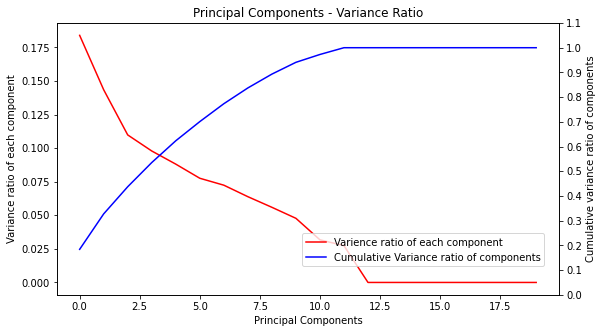

In [73]:
fig, ax1 = plt.subplots(figsize=(9,5))

# Plot variance of each component
ax1.plot(pca.explained_variance_ratio_, label = "Varience ratio of each component", color ="red")
ax1.set_xlabel("Principal Components")
ax1.set_ylabel("Variance ratio of each component")

# Plot cumulative variance of components
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumulative Variance ratio of components',color = "blue")
fig.legend(loc=(0.5,0.2))
ax2.set_ylabel("Cumulative variance ratio of components")
ax2.set_yticks(np.arange(0,1.2,0.1))


ax1.set_title("Principal Components - Variance Ratio")
plt.show()

Almost 95%-98% of variance is explained by first 11 components 

In [74]:
# Apply PCA transformation by setting number of component = 17
pca_11 ,X_pca_11 = apply_pca(X, 11)

In [75]:
X = pd.DataFrame(X_pca_11)
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.698090,0.717420,0.536737,-0.747143,-0.103532,-0.811443,0.296643,0.111422,-0.258551,-0.104708,-0.055028
1,-0.878684,0.772354,0.397241,0.094007,-0.368633,0.276152,-0.308231,-0.593867,-0.039052,-0.800758,-0.302398


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)     # test will be size of 20% 

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
from sklearn.ensemble import RandomForestClassifier
random_forest =  RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)
pred_test = random_forest.predict(X_test)

acc_1 = round(accuracy_score(y_test, pred_test), 4)
print('The accuracy score of Random Forest Model is {}'.format(acc_1))

The accuracy score of Random Forest Model is 0.7379


In [79]:
from sklearn.linear_model import LogisticRegression
log =  LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
pred_test = log.predict(X_test)

acc_2 = round(accuracy_score(y_test, pred_test), 4)
print('The accuracy score of Logistic Regression Model is {}'.format(acc_2))

The accuracy score of Logistic Regression Model is 0.7961


##**Conclusion**
1) Almost 58% of applicant have no dependent  
2)There are 9% applicant whose application are approved and they are self employed.  
3) The Rejection rate for married man is 17.03%  
4) Approval ratio is maximum for who live in Semi Urban area.
5)
6) Approval ratio is highest for married person who live in semiurban area and lowest for unmarried who live in urban area.  
7) Logistics Regression model give the highest accuracy with 79.61% wwhich is greater than Random Forest Model.